# Análisis Exploratio (EDA)

Preguntas objetivos:

- ¿Qué carreras tienen mayor cantidad de titulados?
- ¿Qué tipo de instituciones generan más titulados?
- A que edad promedio se titula una persona de la educación superior? ### no está la cat edad
- Cual es el porcentaje de alumnos que terminan la carrera en la duración teórica?
- Quién saca más profesionales la RM o regiones?


In [27]:
import pandas as pd

####### Análisis exploratorio de datos #######

### Cargar el dataset ###

titulados_2023= pd.read_excel('C:/Users/janov/Desktop/Datasets/Titulados-Ed-Superior-2023/2023.xlsx')

#Imprime las primeras 5 filas
#print(titulados_2023_Cl.head(5))

print(titulados_2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297174 entries, 0 to 297173
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat_periodo              297174 non-null  int64  
 1   codigo_unico             297174 non-null  object 
 2   mrun                     296708 non-null  float64
 3   gen_alu                  297174 non-null  int64  
 4   fec_nac_alu              297174 non-null  int64  
 5   rango_edad               297174 non-null  object 
 6   anio_ing_carr_ori        297174 non-null  int64  
 7   sem_ing_carr_ori         297174 non-null  int64  
 8   anio_ing_carr_act        297174 non-null  int64  
 9   sem_ing_carr_act         297174 non-null  int64  
 10  nomb_titulo_obtenido     264687 non-null  object 
 11  nomb_grado_obtenido      128331 non-null  object 
 12  fecha_obtencion_titulo   297174 non-null  int64  
 13  tipo_inst_1              297174 non-null  object 
 14  tipo

In [28]:
# Seleccionar solo las columnas necesarias
columnas_utiles = ["codigo_unico","mrun","cat_periodo", "anio_ing_carr_act", "nomb_titulo_obtenido", "nomb_carrera", "tipo_inst_1",
                   "dur_total_carr", "dur_estudio_carr", "region_sede", "gen_alu", ]

# Filtrar las columnas que existen en el dataframe
columnas_existentes = [col for col in columnas_utiles if col in titulados_2023.columns]

titulados_2023 = titulados_2023[columnas_existentes]

# Verificar cambios
print(titulados_2023.info())
#print(titulados_2023.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297174 entries, 0 to 297173
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   codigo_unico          297174 non-null  object 
 1   mrun                  296708 non-null  float64
 2   cat_periodo           297174 non-null  int64  
 3   anio_ing_carr_act     297174 non-null  int64  
 4   nomb_titulo_obtenido  264687 non-null  object 
 5   nomb_carrera          297174 non-null  object 
 6   tipo_inst_1           297174 non-null  object 
 7   dur_total_carr        297174 non-null  int64  
 8   dur_estudio_carr      297174 non-null  int64  
 9   region_sede           297174 non-null  object 
 10  gen_alu               297174 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 24.9+ MB
None


# Inspección inicial de los datos

In [29]:
print(titulados_2023.shape)  # Número de filas y columnas

print("###########################")
print(titulados_2023.info())  # Tipo de datos de cada columna

(297174, 11)
###########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297174 entries, 0 to 297173
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   codigo_unico          297174 non-null  object 
 1   mrun                  296708 non-null  float64
 2   cat_periodo           297174 non-null  int64  
 3   anio_ing_carr_act     297174 non-null  int64  
 4   nomb_titulo_obtenido  264687 non-null  object 
 5   nomb_carrera          297174 non-null  object 
 6   tipo_inst_1           297174 non-null  object 
 7   dur_total_carr        297174 non-null  int64  
 8   dur_estudio_carr      297174 non-null  int64  
 9   region_sede           297174 non-null  object 
 10  gen_alu               297174 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 24.9+ MB
None


# Manejo de nulos

In [30]:
print(titulados_2023.isnull().sum())  # Cantidad de valores nulos


codigo_unico                0
mrun                      466
cat_periodo                 0
anio_ing_carr_act           0
nomb_titulo_obtenido    32487
nomb_carrera                0
tipo_inst_1                 0
dur_total_carr              0
dur_estudio_carr            0
region_sede                 0
gen_alu                     0
dtype: int64


In [31]:
titulados_2023['nomb_titulo_obtenido'] = titulados_2023['nomb_titulo_obtenido'].fillna('sin informacion')
titulados_2023['mrun'] = titulados_2023['mrun'].fillna(-1)

# Verificar cambios
print(titulados_2023.isnull().sum())


codigo_unico            0
mrun                    0
cat_periodo             0
anio_ing_carr_act       0
nomb_titulo_obtenido    0
nomb_carrera            0
tipo_inst_1             0
dur_total_carr          0
dur_estudio_carr        0
region_sede             0
gen_alu                 0
dtype: int64


# Manejo de duplicados

In [32]:
total_filas = titulados_2023.shape[0]  # Total de filas
duplicados = titulados_2023.duplicated().sum()  # Filas duplicadas

print(f"Total de filas: {total_filas}")
print(f"Filas duplicadas encontradas: {duplicados}")

duplicados = titulados_2023[titulados_2023.duplicated(keep=False)]  # Obtener todas las filas duplicadas
#print(duplicados.sort_values(by=titulados_2023.columns.tolist()).head(10))  # Mostrar algunos duplicados ordenados

# Eliminar duplicados y mantener solo el primer registro
titulados_2023 = titulados_2023.drop_duplicates()

# Verificar cambios
print(f"Total de filas después de eliminar duplicados: {titulados_2023.shape[0]}")











Total de filas: 297174
Filas duplicadas encontradas: 170
Total de filas después de eliminar duplicados: 297004


# Comprobar Dataset post-limpieza

In [33]:
print(titulados_2023.info())  # Confirmar que no hay valores nulos y tipos de datos correctos
print(titulados_2023.describe())  # Resumen estadístico de las variables numéricas
#print(titulados_2023.head())  # Vista previa del dataset


<class 'pandas.core.frame.DataFrame'>
Index: 297004 entries, 0 to 297173
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   codigo_unico          297004 non-null  object 
 1   mrun                  297004 non-null  float64
 2   cat_periodo           297004 non-null  int64  
 3   anio_ing_carr_act     297004 non-null  int64  
 4   nomb_titulo_obtenido  297004 non-null  object 
 5   nomb_carrera          297004 non-null  object 
 6   tipo_inst_1           297004 non-null  object 
 7   dur_total_carr        297004 non-null  int64  
 8   dur_estudio_carr      297004 non-null  int64  
 9   region_sede           297004 non-null  object 
 10  gen_alu               297004 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 27.2+ MB
None
               mrun  cat_periodo  anio_ing_carr_act  dur_total_carr  \
count  2.970040e+05     297004.0      297004.000000   297004.000000   
mean   1

# Análisis Preguntas objetivos

# ¿Qué carreras tienen mayor cantidad de titulados?

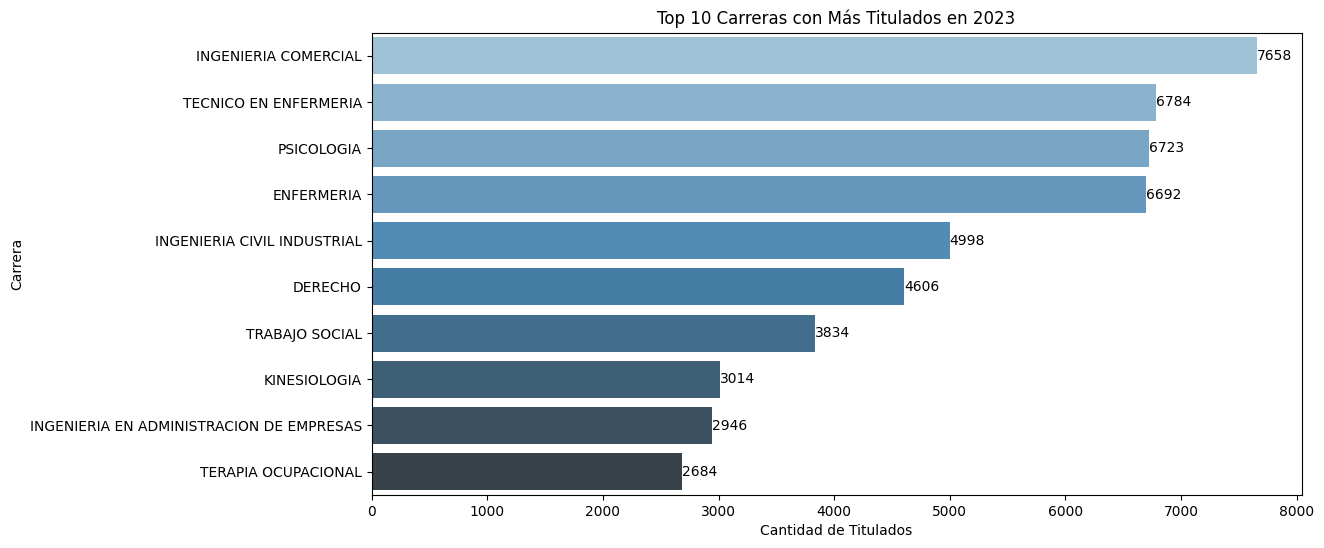

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

top_carreras = titulados_2023["nomb_carrera"].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_carreras.values, y=top_carreras.index, hue=top_carreras.index, palette="Blues_d", dodge=False, legend=False)
plt.xlabel("Cantidad de Titulados")
plt.ylabel("Carrera")
plt.title("Top 10 Carreras con Más Titulados en 2023")

# Agregar etiquetas en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.show()


# ¿Qué tipo de instituciones generan más titulados?

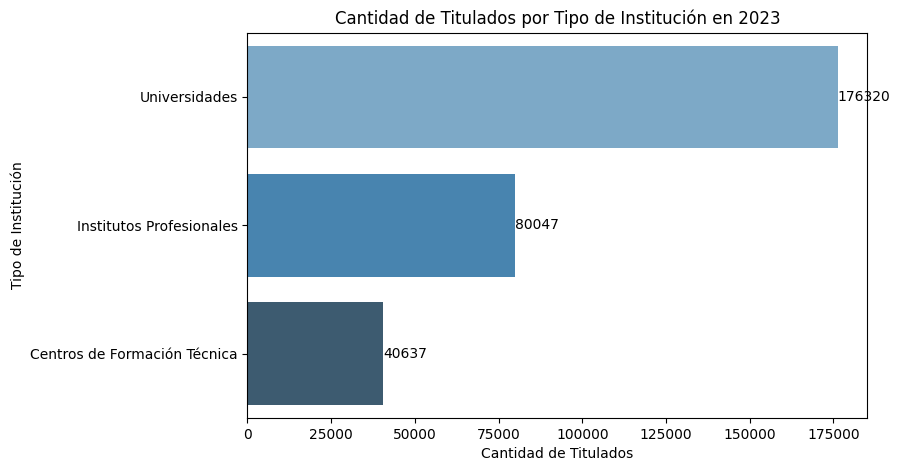

In [40]:
# Reemplazar valores en la columna 'tipo_inst_1'
titulados_2023['tipo_inst_1'] = titulados_2023['tipo_inst_1'].replace('Centros de FormaciÃ³n TÃ©cnica', 'Centros de Formación Técnica')



tipo_inst = titulados_2023["tipo_inst_1"].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=tipo_inst.values, y=tipo_inst.index, palette="Blues_d", hue=tipo_inst.index, legend=False)
plt.xlabel("Cantidad de Titulados")
plt.ylabel("Tipo de Institución")
plt.title("Cantidad de Titulados por Tipo de Institución en 2023")

# Agregar etiquetas en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.show()
